In [215]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pickle
from matplotlib.ticker import MultipleLocator

In [294]:
def price_graph(ax, df):
    size = 20
    a = 0.6

    ax.plot(df.ts, df.price, zorder=1)
    
    buy_data = df[df.action<0]
    ax.scatter(buy_data.ts, buy_data.price, color='g', s=size, alpha=a, zorder=2, marker='x')
    
    sell_data = df[df.action>0]
    ax.scatter(sell_data.ts, sell_data.price, color='r', s=size, alpha=a, zorder=3, marker='x')
    
    ax.set_ylabel('price')
    
def action_graph(ax, df):
    buy_data = df[df.action<0]
    ax.bar(buy_data.ts, buy_data.action, color='g')
    
    sell_data = df[df.action>0]
    ax.bar(sell_data.ts, sell_data.action, color='r')
    
    ax.set_ylabel('action')
    
def profit_graph(ax, df):    
    for e in np.unique(df.episode):
        e_df = df[df.episode==e]
        #a = e_df.profit.cumsum()
        ax.plot(e_df.ts, e_df.bank, color='orange')
    
    ax.set_ylabel('profit')
    ax.set_xlabel('time step')

def graph(df, spacing):
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,8), nrows=3, ncols=1, sharex=True, sharey=False)
    
    price_graph(ax1, df)
    action_graph(ax2, df)
    profit_graph(ax3, df)
    

    minorLocator = MultipleLocator(spacing)
    for ax in [ax1,ax2,ax3]:
        ax.xaxis.set_minor_locator(minorLocator)
        ax.grid(which = 'minor')
    
    plt.show()

In [221]:
fname = "saved_data/forced_explore.pickle"
with open(fname, 'rb') as handle:
    df_explore = pickle.load(handle)

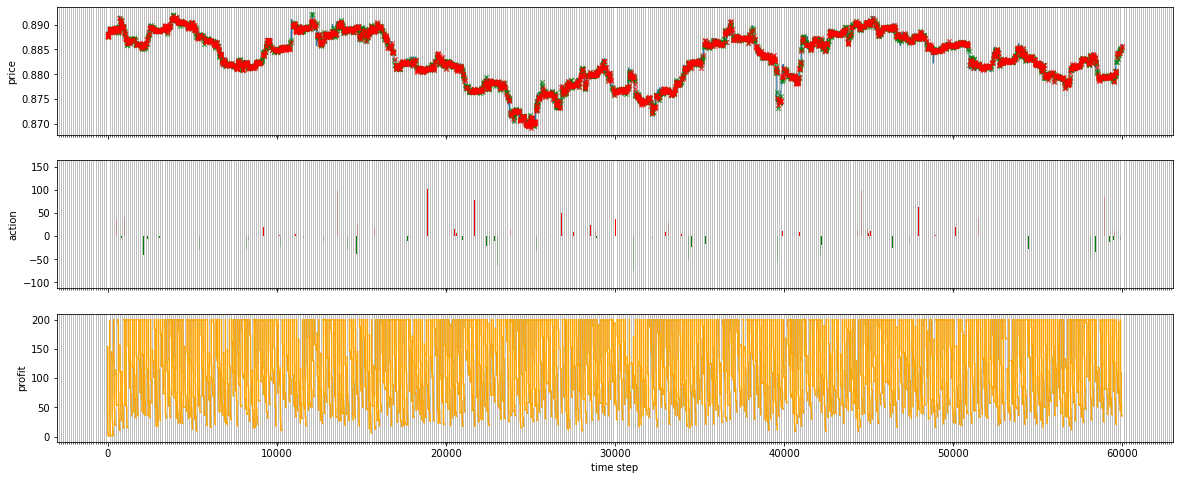

In [295]:
graph(df_explore, 120)

In [225]:
fname = "saved_data/unforced_explore.pickle"
with open(fname, 'rb') as handle:
    df_unexplore = pickle.load(handle)

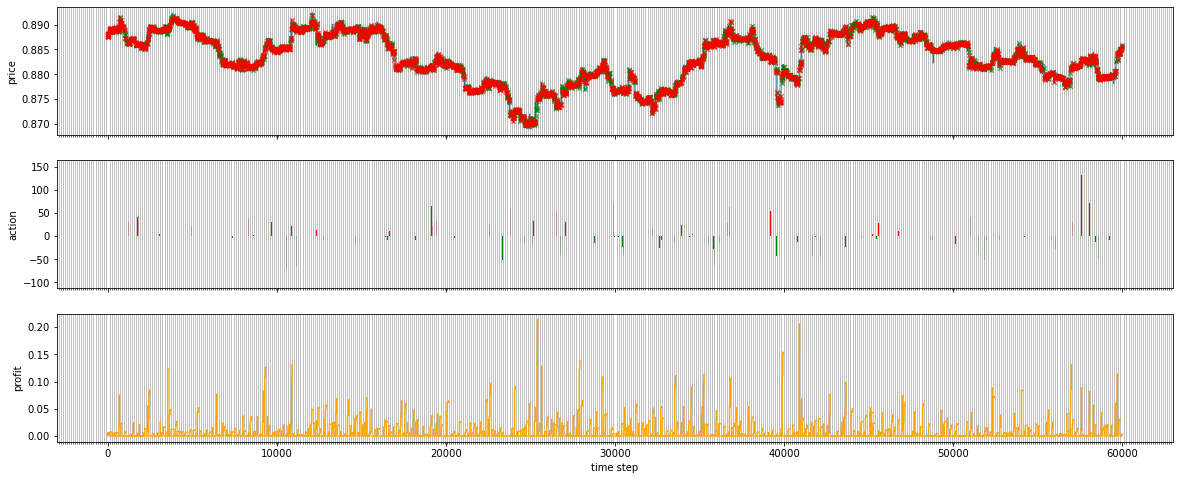

In [246]:
graph(df_unexplore, 120)

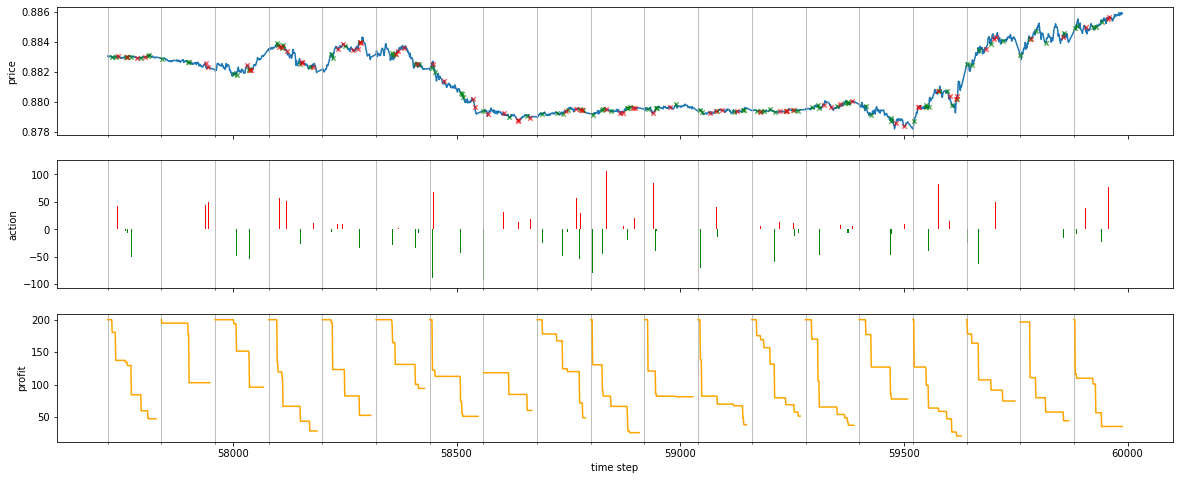

In [298]:
last = 20

ep = df_explore.episode.unique()[-last]
df_explore20 = df_explore[ df_explore.episode>ep]
df_unexplore20 = df_unexplore[ df_unexplore.episode>ep]

graph(df_explore20, 120)

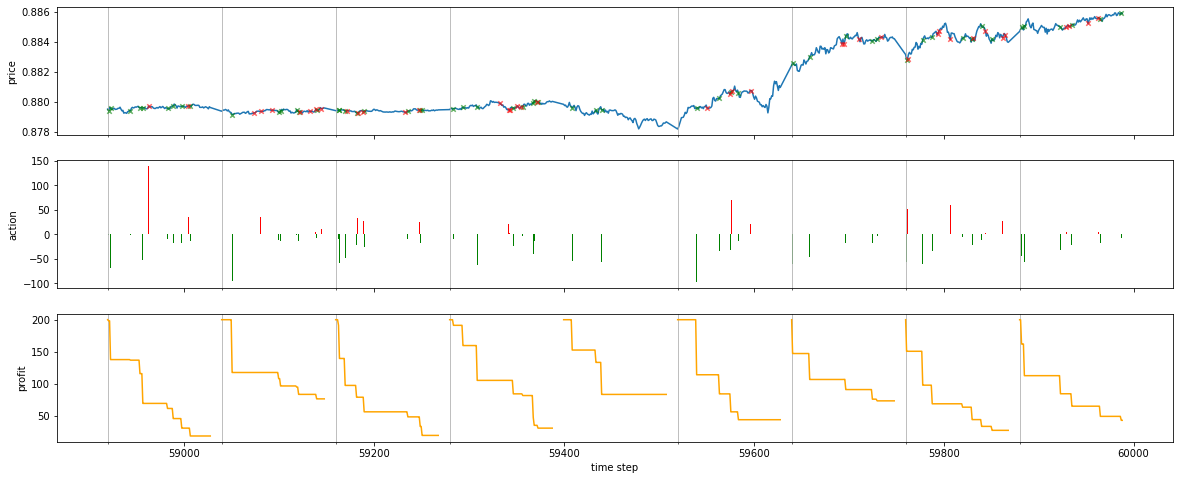

In [297]:
graph(df_unexplore20, 120)

In [275]:
a = df_explore[ df_explore.episode == 495]
b = a[a.action != 0].reset_index()
b

,index,price,episode,ts,inv,profit,bank,action
0,53970,0.87973,495.0,59415.0,26.0,0.0,177.12702,-26.0
1,53982,0.87910,495.0,59427.0,83.0,0.0,127.01832,-57.0
2,54025,0.87891,495.0,59470.0,130.0,0.0,85.70955,-47.0
3,54027,0.87872,495.0,59472.0,139.0,0.0,77.80107,-9.0
4,54037,0.87857,495.0,59482.0,24.0,0.0,77.72982,115.0
5,54056,0.87835,495.0,59501.0,15.0,0.0,77.72478,9.0


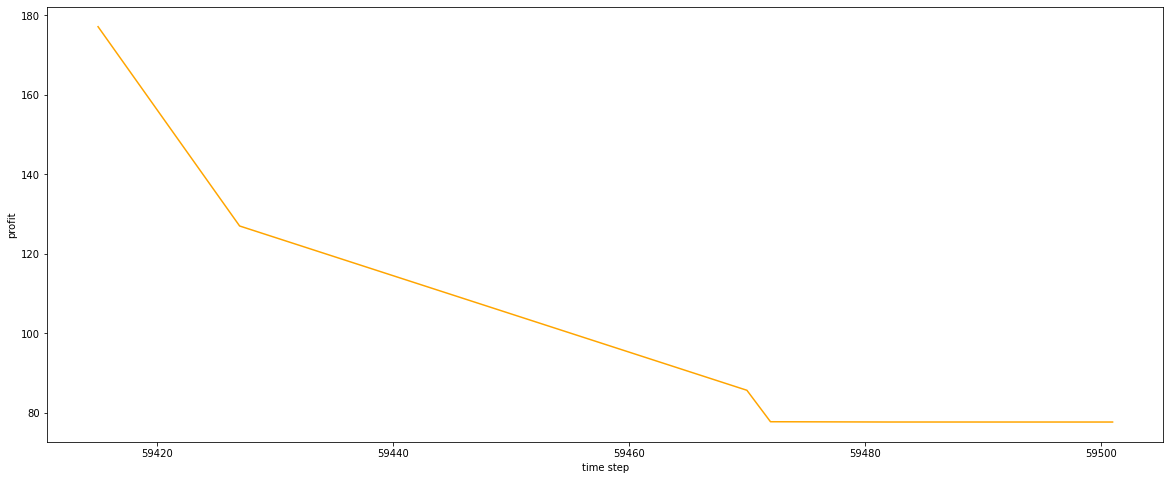

In [301]:
fig, (ax) = plt.subplots(figsize=(20,8), nrows=1, ncols=1)
profit_graph(ax, b)

In [302]:
b.price*b.action.cumsum() + 200

0    177.12702
1    127.03470
2     85.74170
3     77.85792
4    178.91432
5    186.82475
dtype: float64

In [309]:
df_explore[ (df_explore.episode == 0) & (df_explore.action != 0)]

,price,bank,profit,action,inv,ts,episode
0,0.88773,142.29755,0.00000,-65.0,65.0,0.0,0.0
1,0.88788,107.67023,0.00000,-39.0,104.0,1.0,0.0
2,0.88765,63.28773,0.00000,-50.0,154.0,2.0,0.0
3,0.88799,63.28877,0.00104,4.0,150.0,3.0,0.0
4,0.88763,63.28067,0.00000,69.0,81.0,4.0,0.0
5,0.88770,63.27699,0.00000,69.0,12.0,5.0,0.0
6,0.88761,37.53630,0.00000,-29.0,41.0,6.0,0.0
7,0.88768,37.53841,0.00211,37.0,4.0,7.0,0.0
8,0.88766,32.21245,0.00000,-6.0,10.0,8.0,0.0
9,0.88756,32.21230,0.00000,3.0,7.0,9.0,0.0
